In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

In [4]:
x_train = x0_train.reshape(60000, 28*28)
x_test = x0_test.reshape(10000, 28*28)

In [5]:
from keras.utils import np_utils

In [6]:
y_train = np_utils.to_categorical(y0_train,10)

In [7]:
y_test = np_utils.to_categorical(y0_test,10)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [9]:
model = Sequential()

In [28]:
model.add(Dense(input_dim=784, output_dim=500))
model.add(Activation('relu'))

In [29]:
model.add(Dense(output_dim=500))
model.add(Activation('relu'))

In [30]:
model.add(Dense(output_dim=10))
model.add(Activation('softmax'))

In [31]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train,batch_size=100,nb_epoch=20)

Epoch 1/20
60000/60000 [==============================] - 69s - loss: 0.0900 - acc: 0.1059    
Epoch 2/20
60000/60000 [==============================] - 43s - loss: 0.0900 - acc: 0.1124    
Epoch 3/20
60000/60000 [==============================] - 78s - loss: 0.0900 - acc: 0.1124    
Epoch 4/20
60000/60000 [==============================] - 81s - loss: 0.0900 - acc: 0.1124    
Epoch 5/20
60000/60000 [==============================] - 35s - loss: 0.0900 - acc: 0.1124    
Epoch 6/20
60000/60000 [==============================] - 46s - loss: 0.0900 - acc: 0.1124    
Epoch 7/20
60000/60000 [==============================] - 58s - loss: 0.0900 - acc: 0.1124    
Epoch 8/20
60000/60000 [==============================] - 79s - loss: 0.0900 - acc: 0.1124    
Epoch 9/20
60000/60000 [==============================] - 80s - loss: 0.0900 - acc: 0.1124    
Epoch 10/20
60000/60000 [==============================] - 78s - loss: 0.0900 - acc: 0.1124    
Epoch 11/20
60000/60000 [========================

In [33]:
from ipywidgets import interact_manual

In [34]:
result = model.predict_classes(x_test)

10000/10000 [==============================] - 8s     


In [35]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

神經網路判斷為: 1


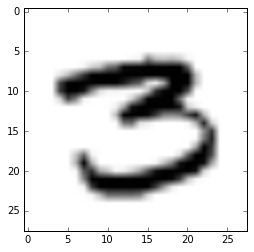

In [36]:
interact_manual(辨識, 測試編號 = (0, 9999));

In [37]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')